<a href="https://colab.research.google.com/github/ranggacey/UasAI/blob/main/UASSAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Eccom.csv to Eccom.csv


In [20]:
print(data.head())

# Menampilkan informasi mengenai dataset
print(data.info())



   Gender  Expense  Checkout  Apk_Blibli  Apk_Bukalapak  Apk_Lazada  \
0       0   600000         3           0              0           0   
1       0   100000         1           0              0           0   
2       0   250000         2           0              0           0   
3       1   200000         4           0              0           0   
4       1   250000         2           0              0           1   

   Apk_Shopee  Apk_Tokopedia  Katagori_Aksesoris  Katagori_Elektronik  \
0           1              0                   0                    0   
1           1              0                   0                    1   
2           0              1                   0                    1   
3           1              0                   1                    0   
4           0              0                   1                    0   

   Katagori_Fashion  Katagori_Makanan  
0                 1                 0  
1                 0                 0  
2             

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('Eccom.csv')


encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# Mengubah kolom 'Apk' menjadi fitur dengan one-hot encoding
data = pd.get_dummies(data, columns=['Apk', 'Katagori'])

# Memisahkan fitur (features) dan label (target)
X = data.drop(['Gender'], axis=1)
y = data['Gender']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi jenis kelamin menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



      Gender        Apk  Expense  Checkout    Katagori
0  Laki-laki     Shopee   600000         3     Fashion
1  Laki-laki     Shopee   100000         1  Elektronik
2  Laki-laki  Tokopedia   250000         2  Elektronik
3  Perempuan     Shopee   200000         4   Aksesoris
4  Perempuan     Lazada   250000         2   Aksesoris


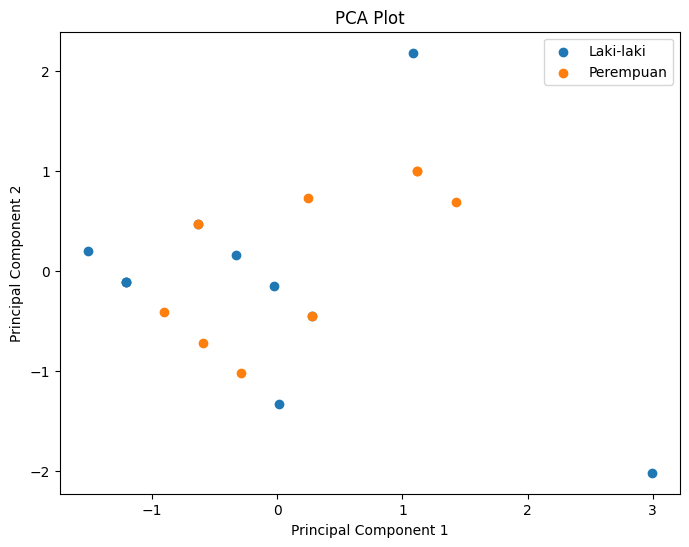

Variance Explained by Each Component: [0.5926132 0.4073868]


In [14]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = pd.read_csv('Eccom.csv')

# Memeriksa beberapa baris pertama dataset untuk melihat struktur data
print(data.head())

# Memisahkan fitur numerik dari fitur kategorikal (jika ada)
numerical_features = ['Expense', 'Checkout']
categorical_features = ['Gender', 'Apk', 'Katagori']

# Mengambil fitur numerik
X = data[numerical_features]

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menerapkan PCA dengan 2 komponen utama
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Membuat DataFrame baru yang berisi hasil PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Menggabungkan hasil PCA dengan fitur kategorikal jika diperlukan
final_df = pd.concat([pca_df, data[categorical_features]], axis=1)

# Menampilkan hasil PCA dalam scatter plot
plt.figure(figsize=(8, 6))
for category in final_df['Gender'].unique():
    plt.scatter(final_df.loc[final_df['Gender'] == category, 'PC1'],
                final_df.loc[final_df['Gender'] == category, 'PC2'],
                label=category)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.legend()
plt.show()

# Melihat varians yang dijelaskan oleh setiap komponen utama
print("Variance Explained by Each Component:", pca.explained_variance_ratio_)


In [15]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Mengimpor dataset
# Pastikan dataset sudah diunggah ke Google Colab atau bisa menggunakan metode lain untuk mengimpor dataset (seperti dari Google Drive)
# Di sini, diasumsikan dataset tersimpan dalam file CSV dengan nama "Eccom.csv"
data = pd.read_csv('Eccom.csv')

# Label Encoding untuk fitur kategorikal (Gender, Apk, Katagori)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Apk'] = label_encoder.fit_transform(data['Apk'])
data['Katagori'] = label_encoder.fit_transform(data['Katagori'])

# Memisahkan fitur dan target
X = data.drop('Katagori', axis=1)  # Fitur-fitur lainnya sebagai X
y = data['Katagori']  # Kolom 'Katagori' sebagai target yang ingin diprediksi

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan melatih model Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Melakukan prediksi menggunakan data uji
y_pred = nb_classifier.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Naive Bayes: {accuracy:.2f}")

# Melihat laporan klasifikasi
print(classification_report(y_test, y_pred))


Akurasi model Naive Bayes: 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.50      0.39         4
weighted avg       0.38      0.50      0.42         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_classifier = DecisionTreeClassifier()

# Latih model
dt_classifier.fit(X_train, y_train)

# Lakukan prediksi
y_pred_dt = dt_classifier.predict(X_test)

# Evaluasi model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi model Decision Tree: {accuracy_dt:.2f}")


Akurasi model Decision Tree: 0.25


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier()

# Latih model
rf_classifier.fit(X_train, y_train)

# Lakukan prediksi
y_pred_rf = rf_classifier.predict(X_test)

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi model Random Forest: {accuracy_rf:.2f}")


Akurasi model Random Forest: 0.50
